https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [38]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('OnlineNewsPopularity.csv', header=0)
names = df.columns
stripped = [s.strip() for s in names]
df.columns=stripped

Analiza eksploracyjna danych

Odrzucanie url i timedelta jako nierelewantne

In [39]:
df.drop(columns=['url', 'timedelta'],inplace=True)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Podział na artykuły popularne i niepopularne - granicą będzie mediana.

In [40]:
shares_median = df['shares'].median()
df['popularity'] = df['shares'].apply(lambda x: 0 if x <shares_median else 1)

In [41]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,0.362981
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,0.480865
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,0.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000,1.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000


In [42]:
df.drop(columns=['shares'],inplace=True)

Z analizy powyższych wykresów wynika, że większość z cech nie posiada wielu danych odstających. Wyjątkiem jest cecha będąca naszym celem, czyli shares, gdzie widać znaczy rozstrzał między wartościami.

In [43]:
data = df.iloc[:,:-1]
target = df.iloc[:,-1]
print(target.shape)
print(data.shape)

(39644,)
(39644, 58)


In [44]:

# plt.hist(target, bins=np.arange(target.min(), target.max()+1, 10))

Po analizie histogramu oraz wykresu pudełkowego widoczne stają się różnice między wartościami w danych, aby zminimalizować problem generowany przez dane odstające zostaną one odrzucone.

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt

data.hist(bins=100, figsize=(100,100))
plt.show()

In [46]:
data_np = np.array(data, dtype=np.int16)
target_np = np.array(target, dtype=np.int16)

In [47]:
print("First news in database")
print(data_np[1,:])
print('---Mean---')
print(data_np.mean(axis=0))
print('--std---')
print(data_np.std(axis=0))

First news in database
[  9 255   0   0   0   3   1   1   0   4   4   0   0   1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
---Mean---
[ 1.03987489e+01  5.46514731e+02  1.76823731e-02  2.62839269e-02
  1.63959237e-02  1.08836898e+01  3.29363838e+00  4.54414287e+00
  1.24987388e+00  4.00110988e+00  7.22376652e+00  5.29462214e-02
  1.78009283e-01  1.57854909e-01  5.85965089e-02  1.85299163e-01
  2.12566845e-01  2.61068005e+01  1.02335413e+03  3.06996595e+02
  2.93159293e+03 -8.08959247e+03  5.41453511e+02  1.11691212e+03
  5.20214832e+03  3.12544166e+03  2.27125247e+03  4.14326488e+03
  3.46237347e+03  1.68020381e-01  1.86409040e-01  1.87544143e-01
  1.83306427e-01  1.43804863e-01  6.18756937e-02  6.90394511e-02
  1.30915145e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00897992e-04  0.00000000e+00
  0.00000000e+

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_np)

In [49]:
print("First news in database")
print(scaled_data[1,:])
print('---Mean---')
print(scaled_data.mean(axis=0))
print('--std---')
print(scaled_data.std(axis=0))

First news in database
[-6.61656647e-01 -6.18793806e-01 -5.02246297e-03 -5.02246297e-03
 -5.02246297e-03 -6.95709247e-01 -5.94963251e-01 -4.26525775e-01
 -3.04268192e-01 -1.42550724e-03 -1.68862599e+00 -2.36445017e-01
 -4.65358733e-01  2.30974702e+00 -2.49487028e-01 -4.76911337e-01
 -5.19566229e-01 -3.74923515e-01 -4.98382469e-01 -5.38986774e-01
 -3.26119282e-01  6.66611322e-01 -2.84326065e-02 -9.82123919e-01
 -1.46622155e+00 -2.38479474e+00 -4.57481217e-01 -5.10458697e-01
 -5.38164453e-01  2.22523233e+00 -4.78663628e-01 -4.80454058e-01
 -4.73760968e-01 -4.09826850e-01 -2.56820594e-01 -2.72322187e-01
 -3.88118062e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00453060e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.88764891e-01 -2.79744773e-02
 -1.42069249e-02 -1.42069249e-02 -7.72701259e-01  3.58902004e-02
  4.03593317e-01  3.58902004e-02 -2.60925298e-01 -7.02586927e-02
  0.00000000e+00 -1.36581870e-01]
---Mean---
[ 3.78535531e-16  6.70

In [50]:
from sklearn.model_selection import train_test_split

news_train_data, news_test_data, \
news_train_target, news_test_target = \
train_test_split(scaled_data,target, test_size=0.2, random_state=10)

In [51]:
print("Training dataset:")
print("news_train_data:", news_train_data.shape)
print("news_train_target:", news_train_target.shape)

print("Testing dataset:")
print("news_test_data:", news_test_data.shape)
print("news_test_target:", news_test_target.shape)

Training dataset:
news_train_data: (31715, 58)
news_train_target: (31715,)
Testing dataset:
news_test_data: (7929, 58)
news_test_target: (7929,)


In [52]:
def printCrossValScore(name, sc):
    print("Cross Validations scores for ", name)
    print("Wyniki: ", sc)
    print("Średnia: ", sc.mean())    
    print("Odchylenie standardowe: ", sc.std())   

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
scores = cross_val_score(log_reg, news_train_data, news_train_target, scoring='accuracy', cv=5)
print(scores)

[0.66656156 0.67129119 0.6660886  0.66876872 0.67791266]


In [54]:
printCrossValScore("Linear Regression", scores)

Cross Validations scores for  Linear Regression
Wyniki:  [0.66656156 0.67129119 0.6660886  0.66876872 0.67791266]
Średnia:  0.6701245467444428
Odchylenie standardowe:  0.00430900717158605


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

sgd_reg = SGDClassifier()
scores = cross_val_score(sgd_reg, news_train_data, news_train_target, scoring='accuracy', cv=5)
print(scores)

[0.66057071 0.65883651 0.65710232 0.66466971 0.66388144]


In [56]:
printCrossValScore("SGD Regression", scores)


Cross Validations scores for  SGD Regression
Wyniki:  [0.66057071 0.65883651 0.65710232 0.66466971 0.66388144]
Średnia:  0.6610121393662305
Odchylenie standardowe:  0.0028922547174443777


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier()
scores = cross_val_score(tree_reg, news_train_data, news_train_target, scoring='accuracy', cv=5)
print(scores)

[0.58694624 0.59372537 0.60365758 0.59687845 0.61437805]


In [58]:
printCrossValScore("Decision Tree Regression", scores)


Cross Validations scores for  Decision Tree Regression
Wyniki:  [0.58694624 0.59372537 0.60365758 0.59687845 0.61437805]
Średnia:  0.5991171370014189
Odchylenie standardowe:  0.009335146846312871


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_reg = KNeighborsClassifier()
scores = cross_val_score(knn_reg, news_train_data, news_train_target, scoring='accuracy', cv=5)
print(scores)

KeyboardInterrupt: 

In [ ]:
printCrossValScore("KNN Regression", scores)

Cross Validations scores for  KNN Regression
Wyniki:  [0.60381523 0.58978401 0.59561722 0.61311682 0.61343213]
Średnia:  0.6031530821377897
Odchylenie standardowe:  0.009390363520485275


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    # 'n_neighbors': [3,5,7,10,15], 'weights':['uniform','distance'], 'leaf_size':[15,30,60,90]
    'n_neighbors': [10,15], 'weights':['uniform','distance'], 'leaf_size':[5,15,30]
}


grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring="accuracy", cv=5, return_train_score=True, verbose=3)
grid_search.fit(news_train_data, news_train_target)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.691, test=0.616) total time=   0.8s
[CV 2/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.690, test=0.601) total time=   1.1s
[CV 3/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.690, test=0.603) total time=   0.7s
[CV 4/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.687, test=0.622) total time=   0.6s
[CV 5/5] END leaf_size=5, n_neighbors=10, weights=uniform;, score=(train=0.683, test=0.617) total time=   0.9s
[CV 1/5] END leaf_size=5, n_neighbors=10, weights=distance;, score=(train=1.000, test=0.624) total time=   0.8s
[CV 2/5] END leaf_size=5, n_neighbors=10, weights=distance;, score=(train=1.000, test=0.609) total time=   0.7s
[CV 3/5] END leaf_size=5, n_neighbors=10, weights=distance;, score=(train=1.000, test=0.612) total time=   0.6s
[CV 4/5] END leaf_size=5, n_neighbors=10, weight

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 15, 30], 'n_neighbors': [10, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.6276840611697934
{'leaf_size': 5, 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=5, n_neighbors=15, weights='distance')


In [ ]:
log_reg.fit(news_train_data, news_train_target)
sgd_reg.fit(news_train_data, news_train_target)
tree_reg.fit(news_train_data, news_train_target)
knn_reg = grid_search.best_estimator_
knn_reg.fit(news_train_data, news_train_target)

KNeighborsClassifier(leaf_size=5, n_neighbors=15, weights='distance')

In [ ]:
log_pred = log_reg.predict(news_test_data)
sgd_pred = sgd_reg.predict(news_test_data)
knn_pred = knn_reg.predict(news_test_data)
tree_pred = tree_reg.predict(news_test_data)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

def printScores():
      global news_test_target, knn_pred, log_pred, sgd_pred, tree_pred
      # print(" linear reg Mean squared error of a taught model: %.2f" % 
      #       mean_squared_error(news_test_target, log_pred))
      # print(" sgd reg Mean squared error of a taught model: %.2f" % 
      #       mean_squared_error(news_test_target, sgd_pred))
      # print(" knn reg Mean squared error of a taught model: %.2f" % 
      #       mean_squared_error(news_test_target, knn_pred))
      # print(" tree reg Mean squared error of a taught model: %.2f" % 
      #       mean_squared_error(news_test_target, tree_pred))

      print('linear reg r2 score: %.2f' % accuracy_score(news_test_target, log_pred))
      print('sgd reg r2 score: %.2f' % accuracy_score(news_test_target, sgd_pred))
      print('knn reg r2 score: %.2f' % accuracy_score(news_test_target, knn_pred))
      print('tree reg r2 score: %.2f' % accuracy_score(news_test_target, tree_pred))

printScores()

linear reg r2 score: 0.65
sgd reg r2 score: 0.64
knn reg r2 score: 0.63
tree reg r2 score: 0.58


In [ ]:
from sklearn.metrics import confusion_matrix
def plotConfMatrix(name, y_pred):
    global news_test_target
    cm=confusion_matrix(news_test_target,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    plt.title(name)
    plt.show()

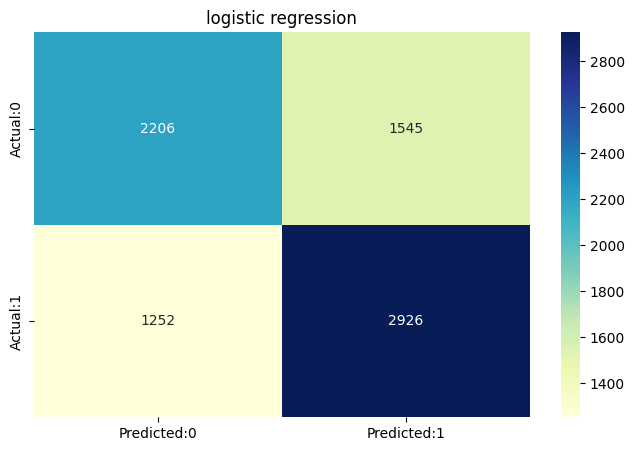

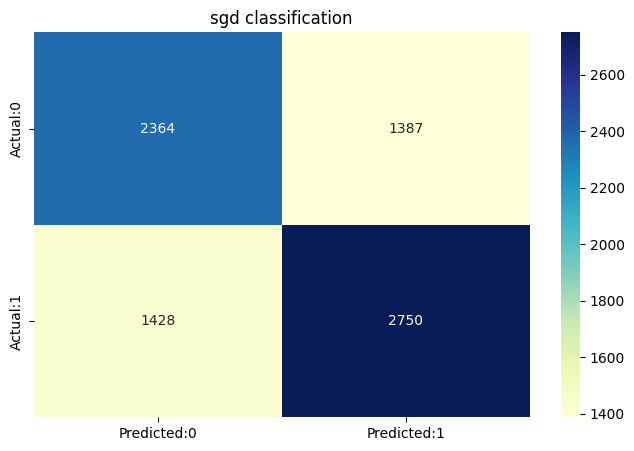

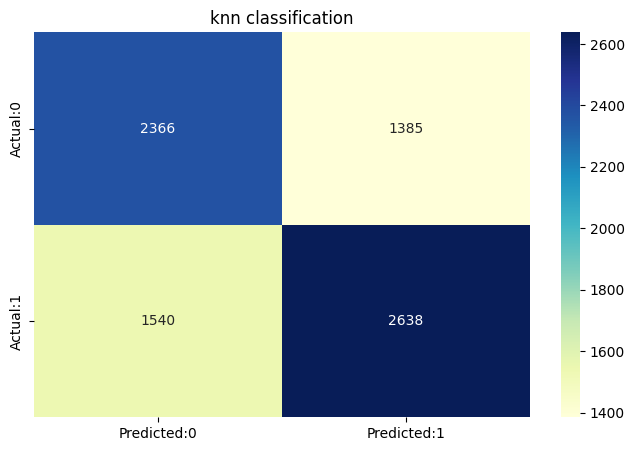

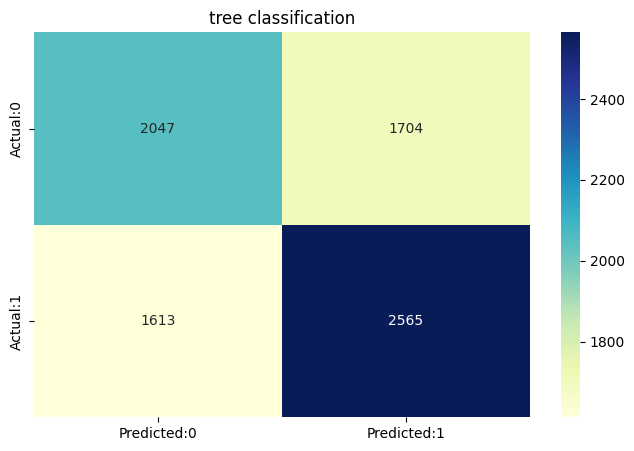

In [ ]:
plotConfMatrix("logistic regression", log_pred)
plotConfMatrix("sgd classification", sgd_pred)
plotConfMatrix("knn classification", knn_pred)
plotConfMatrix("tree classification", tree_pred)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import RFE

pt = PolynomialFeatures(2, )
normalizer = Normalizer()
scaler = StandardScaler()

news_train_poly = pt.fit_transform(news_train_data)
news_test_poly = pt.fit_transform(news_test_data)

normalized_news_train_poly = normalizer.fit_transform(news_train_data)
normalized_news_test_poly = normalizer.fit_transform(news_test_data)

scaled_news_train_poly = scaler.fit_transform(news_train_data)
scaled_news_test_poly = scaler.fit_transform(news_test_data)


In [ ]:
def fitAndScore(regressor,train, test, name):
    regressor.fit(train, news_train_target)
    score = regressor.score(test, news_test_target) #r2_score
    print("Accuracy score "+name+": %.2f" % score)


In [ ]:
regressors = (log_reg, knn_reg, tree_reg, sgd_reg)
names = ("log_reg", "knn_reg", "tree_reg", "sgd_reg")

for reg, name in zip(regressors, names):
    print(name)
    fitAndScore(reg, news_train_poly, news_test_poly, name+" using polynomial features")
    fitAndScore(reg, normalized_news_train_poly,normalized_news_test_poly, name+" using normalized polynomial features")
    fitAndScore(reg, scaled_news_train_poly,scaled_news_test_poly, name+" using scaled polynomial features")

log_reg


c:\Users\Szymek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean squared error of a log_reg using polynomial features: 0.66
Variance score log_reg using polynomial features: 0.66
Mean squared error of a log_reg using normalized polynomial features: 0.65
Variance score log_reg using normalized polynomial features: 0.65
Mean squared error of a log_reg using scaled polynomial features: 0.65
Variance score log_reg using scaled polynomial features: 0.65
knn_reg
Mean squared error of a knn_reg using polynomial features: 0.63
Variance score knn_reg using polynomial features: 0.63
Mean squared error of a knn_reg using normalized polynomial features: 0.64
Variance score knn_reg using normalized polynomial features: 0.64
Mean squared error of a knn_reg using scaled polynomial features: 0.63
Variance score knn_reg using scaled polynomial features: 0.63
tree_reg
Mean squared error of a tree_reg using polynomial features: 0.58
Variance score tree_reg using polynomial features: 0.58
Mean squared error of a tree_reg using normalized polynomial features: 0.58


In [ ]:

# for reg, name in zip(regressors, names):
#     rfe = RFE(estimator=reg, n_features_to_select=45)
#     fitAndScore(reg, news_train_poly, news_test_poly, name+" using polynomial features")
#     fitAndScore(reg, normalized_news_train_poly,normalized_news_test_poly, name+" using normalized polynomial features")
#     fitAndScore(reg, scaled_news_train_poly,scaled_news_test_poly, name+" using scaled polynomial features")

In [ ]:
news_train_poly.shape

(29503, 1770)

In [ ]:
# from sklearn.feature_selection import RFE
# features = [50, 40, 30, 25, 15, 10, 5]
# mse = []
# r2_score = []
# # regressors = [log_reg, sgd_reg, tree_reg]

# for reg, name in zip(regressors, names):
#     f_mse = []
#     f_r2 = []
#     for f in features:
#         print("name: ", name,", Features:",f)
#         sel_ = RFE(estimator=reg, n_features_to_select=f)
#         sel_.fit(news_train_data, news_train_target)
#         # fitAndScore(sel_, news_train_data, news_test_data, name+" using normal features")
#         # fitAndScore(sel_, scaled_data, news_test_data, name+" using normalized polynomial features")
#         # fitAndScore(sel_, scaled_news_train_poly,scaled_news_test_poly, name+" using scaled polynomial features") 
#         print(sel_.score(news_test_data, news_test_target))
#         # ms_err = mean_squared_error(housig_test_t, sel_.predict(housig_test_poly_arr[i]))
#         # f_r2.append(r_err)
#         # f_mse.append(ms_err)
        
#         # print("degree: ", i,", Features:",f," - Linear Regression variance score using _selected_ polynomial features: %.2f" % r_err)
        
#     # mse.append(f_mse)
#     # r2_score.append(f_r2)

In [ ]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=0.5, max_iter=5000,)
lasso_r.fit(news_train_poly, news_train_target)

print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(news_test_target, lasso_r.predict(news_test_poly)))
score = lasso_r.score(news_test_poly, news_test_target) #r2_score
print("Lasso regression variance score: %.2f" % score)

In [ ]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=0.5, max_iter=5000,)
lasso_r.fit(news_train_data, news_train_target)

pred = lasso_r.predict(news_test_data)

print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(news_test_target, pred))
score = lasso_r.score(news_test_data, news_test_target) #r2_score
print("Lasso regression variance score: %.2f" % score)

Mean squared error of a linear moderl: 2158394.36
Lasso regression variance score: 0.09


In [ ]:
for i in range(20):
    print("Prediceted: "+str(pred[i])+", real:"+str(news_test_target.iloc[i]))

Prediceted: 1880.3036639594632, real:1700
Prediceted: 1195.6356263672483, real:489
Prediceted: 1634.8147581153908, real:1400
Prediceted: 1608.7297100875494, real:716
Prediceted: 2584.7017490954113, real:950
Prediceted: 1396.009555935786, real:2900
Prediceted: 1986.2686072674792, real:1900
Prediceted: 1383.4755806767541, real:958
Prediceted: 1841.773863187648, real:1400
Prediceted: 2555.0551798241677, real:2300
Prediceted: 2332.7869835703573, real:6300
Prediceted: 2131.7561578503783, real:3200
Prediceted: 1403.5391004824755, real:1100
Prediceted: 2149.899926431773, real:2900
Prediceted: 2037.2638116789255, real:4500
Prediceted: 2178.033490814272, real:2200
Prediceted: 1773.8589494958271, real:1300
Prediceted: 1494.2860629585057, real:1600
Prediceted: 2328.9241473301445, real:1400
Prediceted: 1304.5349298235044, real:631
